# CNN - Cat vs. Dog

In [30]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as ply
%matplotlib inline

In [31]:
file_classes = ['dogs', 'cats']

In [32]:
train_path = 'Projects/keras/cats-and-dogs/train'
valid_path = 'Projects/keras/cats-and-dogs/valid'
test_path = 'Projects/keras/cats-and-dogs/test'

In [33]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=file_classes, batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=file_classes, batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=file_classes, batch_size=10)

Found 113 images belonging to 2 classes.
Found 141 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [34]:
def plots (ims, figsize=(12, 6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0, 2, 3, 1))
            
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [35]:
imgs, labels = next(train_batches)

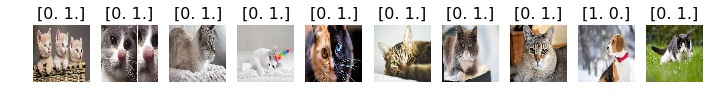

In [36]:
plots(imgs, titles=labels)

# Build and train CNN

In [40]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(len(file_classes), activation='softmax'),
])

In [41]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit_generator(train_batches, steps_per_epoch=4,
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 4s - loss: 4.0587 - acc: 0.7250 - val_loss: 6.0443 - val_acc: 0.6250
Epoch 2/5
 - 2s - loss: 4.0295 - acc: 0.7500 - val_loss: 2.0148 - val_acc: 0.8750
Epoch 3/5
 - 2s - loss: 2.8524 - acc: 0.8230 - val_loss: 3.0221 - val_acc: 0.8125
Epoch 4/5
 - 2s - loss: 2.8207 - acc: 0.8250 - val_loss: 5.0369 - val_acc: 0.6875
Epoch 5/5
 - 2s - loss: 4.0295 - acc: 0.7500 - val_loss: 4.0295 - val_acc: 0.7500


# Predict

c:\users\aranm\appdata\local\programs\python\python37\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


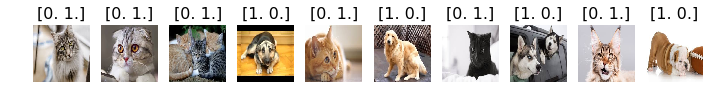

In [43]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [44]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 1., 0., 1., 0., 1., 0., 1.], dtype=float32)

In [45]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [46]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [47]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [48]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Norm')
        
    else:
        print('CM wo Norm')
        
    print(cm)
    

CM wo Norm
[[6 0]
 [4 0]]


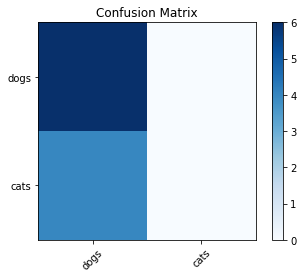

In [49]:
plot_confusion_matrix(cm, file_classes)